In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## Runge-Kutta 4

In [2]:
def rk4(f, q0, t0, tf, n):
    '''Runge-Kutta 4'''

    t = np.linspace(t0, tf, n+1)
    h = t[1]-t[0]
    q = np.array((n+1)*[q0])
    
    for i in range(n):
        k1 = h * f(q[i], t[i])
        k2 = h * f(q[i] + 0.5 * k1, t[i] + 0.5*h)
        k3 = h * f(q[i] + 0.5 * k2, t[i] + 0.5*h)
        k4 = h * f(q[i] + k3, t[i] + h)
        q[i+1] = q[i] + (k1 + 2*(k2 + k3) + k4) / 6

    return q, t

## Simple Pendulum

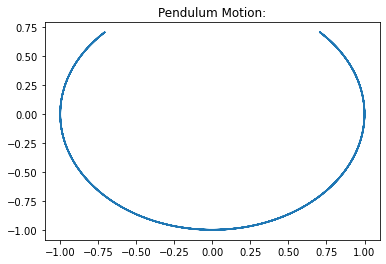

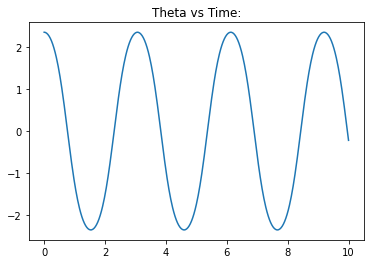

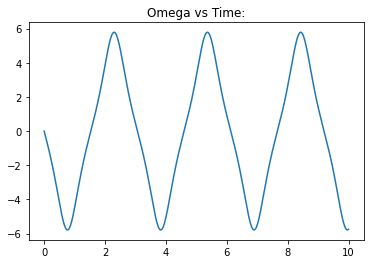

In [4]:
g = 9.81

m1 = 1
l1 = 1

q01 = 135
u01 = 0

q0 = np.array([np.radians(q01), np.radians(u01)])

t0 = 0
tf = 10
nstep = 500

#q[0] = theta1
#q[1] = omega1
def motion(q, t):
    '''Equazione del Moto'''

    td = q[1]
    od = -m1*(g/l1)*np.sin(q[0])
    return np.array([td, od])


q, t = rk4(motion, q0, t0 , tf , nstep)


theta1, omega1 = q.T


plt.figure(1)
plt.title('Pendulum Motion:')
plt.plot(+np.sin(theta1), -np.cos(theta1))

plt.figure(2)
plt.title('Theta vs Time:')
plt.plot(t, theta1)

plt.figure(3)
plt.title('Omega vs Time:')
plt.plot(t, omega1)

plt.show()

## Double Pendulum

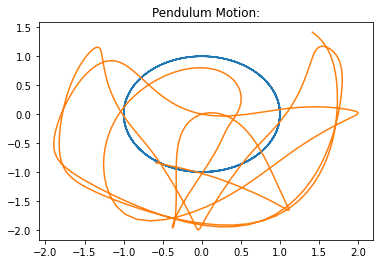

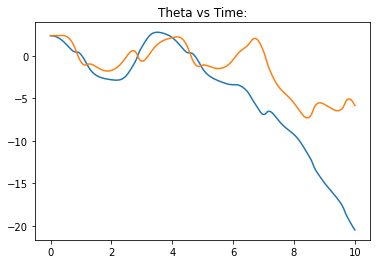

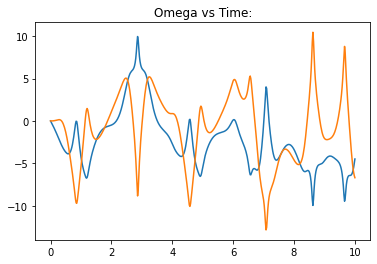

In [10]:
g = 9.81

m1 = 1
m2 = 1
l1 = 1
l2 = 1

q01 = 135
q02 = 135

u01 = 0
u02 = 0

q0 = np.array([np.radians(q01), np.radians(u01), np.radians(q02), np.radians(u02)])

t0 = 0
tf = 10
nstep = 500

#q[0] = theta1
# #q[1] = omega1
# #q[2] = theta2
# #q[3] = omega2
def motion(q, t):
    '''Equazione del Moto'''

    td1 = q[1]
    td2 = q[3]

    od1 = (-g * (2*m1 + m2) * np.sin(q[0]) -m2 * g * np.sin(q[0]-2*q[2]) -2 * np.sin(q[0]-q[2]) * m2 * (l2 * q[3]**2 + l1 * q[1]**2 * np.cos(q[0]-q[2]))) / (l1 * (2*m1 + m2 - m2*np.cos(2*q[0]-2*q[2])))
    od2 = (2 * np.sin(q[0]-q[2]) * ( l1 * q[1]**2 * (m1+m2) + g * (m1+m2) * np.cos(q[0]) + m2 * l2 * q[3]**2 * np.cos(q[0]-q[2]))) / (l2 * (2*m1 + m2 - m2*np.cos(2*q[0]-2*q[2])))

    return np.array([td1, od1, td2, od2])


q, t = rk4(motion, q0, t0 , tf , nstep)


t1, o1, t2, o2 = q.T


plt.figure(1)
plt.title('Pendulum Motion:')
plt.plot(np.sin(t1), -np.cos(t1))
plt.plot(np.sin(t1)+np.sin(t2), -np.cos(t1)-np.cos(t2))

plt.figure(2)
plt.title('Theta vs Time:')
plt.plot(t, t1)
plt.plot(t, t2)

plt.figure(3)
plt.title('Omega vs Time:')
plt.plot(t, o1)
plt.plot(t, o2)

plt.show()

## Triple Pendulum

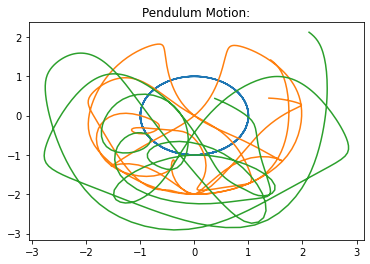

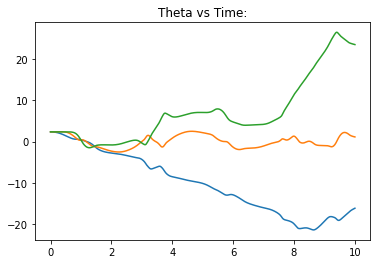

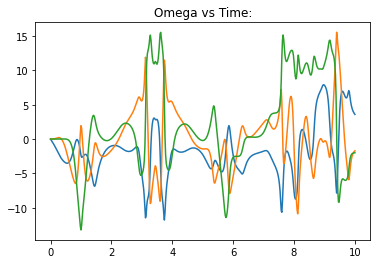

In [13]:
g = 9.81

m0 = 1
m1 = 1
m2 = 1

l0 = 1
l1 = 1
l2 = 1

q00 = 135
q01 = 135
q02 = 135

u00 = 0
u01 = 0
u02 = 0

q0 = np.array([np.radians(q00), np.radians(u00), 
                np.radians(q01), np.radians(u01),
                np.radians(q02), np.radians(u02)])

t0 = 0
tf = 10
nstep = 500


#q[0] = theta0
#q[1] = omega0
#q[2] = theta1
#q[3] = omega1
#q[4] = theta2
#q[5] = omega2
def motion(q, t):
    '''Equazione del Moto'''

    m01 = m0 + m1
    m02 = m0 + m2
    m12 = m1 + m2
    m012 = m0 + m1 + m2
    mf = m012/4

    cos0 = np.cos(q[0])
    cos1 = np.cos(q[2])
    cos2 = np.cos(q[4])
    sin0 = np.sin(q[0])
    sin1 = np.sin(q[2])
    sin2 = np.sin(q[4])

    cos01 = np.cos(q[0]-q[2])
    cos02 = np.cos(q[0]-q[4])
    cos12 = np.cos(q[2]-q[4])
    sin01 = np.sin(q[0]-q[2])
    sin02 = np.sin(q[0]-q[4])
    sin12 = np.sin(q[2]-q[4])

    r1 = m12*cos01*cos02 - m012*cos12
    r2 = m012 - m12*(cos01)**2
    r3 = -m012 + m2*(cos02)**2

    od1_1 = 4*m2*m12
    od1_2 = r1*cos01 + r2*cos02
    od1_3 = -g*sin2 + l0*sin02*q[1]**2 + l1*sin12*q[3]**2
    od1_4 = -g*m1*sin1 - g*m2*sin1 + l0*m1*sin01*q[1]**2 + l0*m2*sin01*q[1]**2 - l2*m2*sin12*q[5]**2
    od1_5 = -m2*m12*( -cos02 + np.cos(q[0]-2*q[2]+q[4]) )**2 * m012
    od1_6 = g*m0*sin0 + g*m1*sin0 + g*m2*sin0 + l1*m1*sin01*q[3]**2 + l1*m2*sin01*q[3]**2 + l2*m2*sin02*q[5]**2
    od1_7 = m2*r1**2 + m12*r3*r2

    od2_1 = -g*sin2 + l0*sin02*q[1]**2 + l1*sin12*q[3]**2
    od2_2 = g*m0*sin0 + g*m1*sin0 + g*m2*sin0 + l1*m1*sin01*q[3]**2 + l1*m2*sin01*q[3]**2 + l2*m2*sin02*q[5]**2
    od2_3 = -g*m1*sin1 - g*m2*sin1 + l0*m1*sin01*q[1]**2 + l0*m2*sin01*q[1]**2 - l2*m2*sin12*q[5]**2

    od3_1 = g*m0*sin0 + g*m1*sin0 + g*m2*sin0 + l1*m1*sin01*q[3]**2 + l1*m2*sin01*q[3]**2 + l2*m2*sin02*q[5]**2
    od3_2 = -g*sin2 + l0*sin02*q[1]**2 + l1*sin12*q[3]**2
    od3_3 = g*m1*sin1 + g*m2*sin1 - l0*m1*sin01*q[1]**2 - l0*m2*sin01*q[1]**2 + l2*m2*sin12*q[5]**2

    td1 = q[1]
    td2 = q[3]
    td3 = q[5]

    od1 = mf * ( od1_1 * od1_2 * od1_3 * r2 - 4 * ( -m2 * od1_2 * r1 + ( m2 * r1**2 + m12 * r3 * r2 ) * cos01 ) * od1_4 - ( od1_5 + 4*m2*r1**2 + 4*m12*r3*r2 ) * od1_6 ) / ( l0 * od1_7 * m012 * r2)
    od2 = ( -m2 * r1 * m012 * od2_1 * r2 - ( m2 * ( r1*cos01 + r2*cos02 ) * r1 - ( m2*r1**2 + m12*r3*r2 ) * cos01 ) * od2_2 + m012*r3*r2*od2_3 ) / ( l1 * od1_7 * r2 )
    od3 = -( m12 * (od1_2) * (od3_1) + m12 * m012 * (od3_2) * r2 - r1*m012 * od3_3 ) / ( l2 * ( m2*r1**2 + m12*r3*r2 ) )

    return np.array([td1, od1, td2, od2, td3, od3])


q, t = rk4(motion, q0, t0 , tf , nstep)


t1, o1, t2, o2, t3, o3 = q.T


plt.figure(1)
plt.title('Pendulum Motion:')
plt.plot( np.sin(t1), -np.cos(t1) )
plt.plot( np.sin(t1) + np.sin(t2), -( np.cos(t1) + np.cos(t2) ) )
plt.plot( np.sin(t1) + np.sin(t2) + np.sin(t3), -( np.cos(t1) + np.cos(t2) + np.cos(t3) ) )
    
plt.figure(2)
plt.title('Theta vs Time:')
plt.plot(t, t1)
plt.plot(t, t2)
plt.plot(t, t3)
plt.figure(3)
plt.title('Omega vs Time:')
plt.plot(t, o1)
plt.plot(t, o2)
plt.plot(t, o3)
plt.show()